In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = r"D:\10x\data\week_0\projcet_one\data\sierraleone-bumbuna.csv" 
data = pd.read_csv(file_path)

## Display the first few rows
print(data.head(5))


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [2]:
# Dataset overview
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [3]:
print(data.isnull().sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


EDA

In [4]:
# Drop the 'Comments' column
data = data.drop(columns=['Comments'])

In [5]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


Date Cleaning 

In [6]:
# Convert Timestamp to a datetime format:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [7]:
# Summary statistics for numerical columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

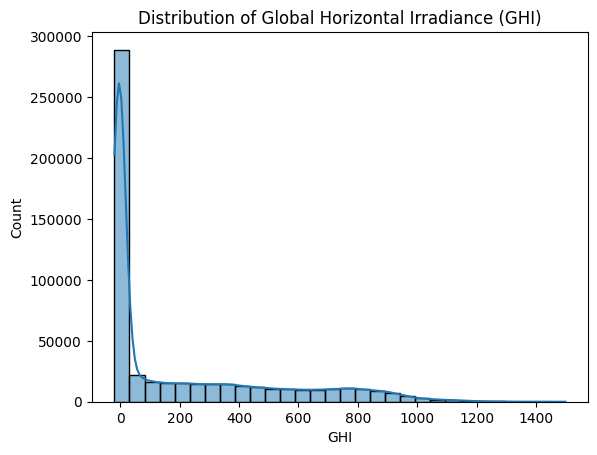

In [8]:
# Distribution of Global Horizontal Irradiance (GHI)
sns.histplot(data['GHI'], bins=30, kde=True)
plt.title('Distribution of Global Horizontal Irradiance (GHI)')

plt.show()

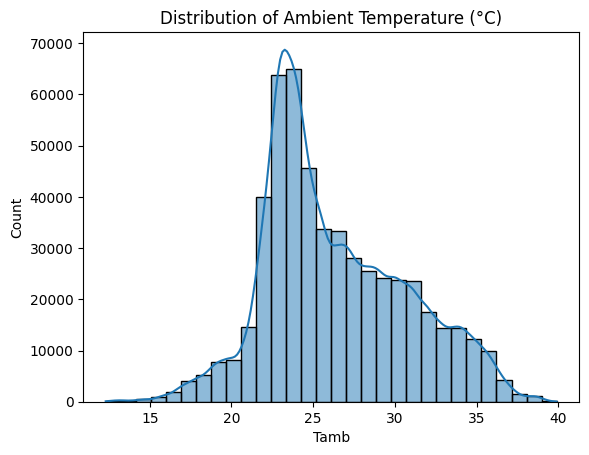

In [9]:
# Distribution of Ambient Temperature
sns.histplot(data['Tamb'], bins=30, kde=True)
plt.title('Distribution of Ambient Temperature (°C)')
plt.show()

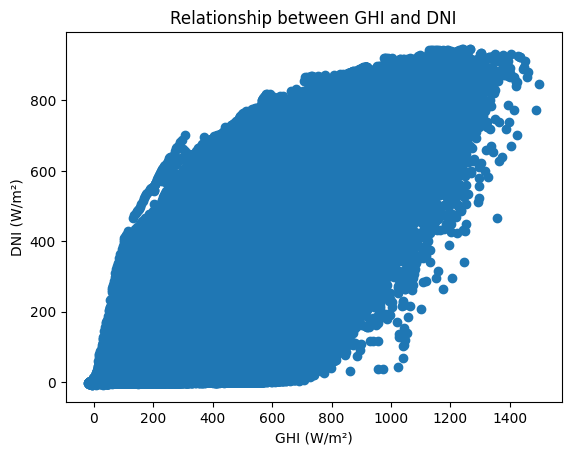

In [10]:
# Analyze relationships between variables using scatter plots and correlation matrices.

# Scatter Plot:
plt.scatter(data['GHI'], data['DNI'])
plt.xlabel('GHI (W/m²)')
plt.ylabel('DNI (W/m²)')
plt.title('Relationship between GHI and DNI')
plt.show()

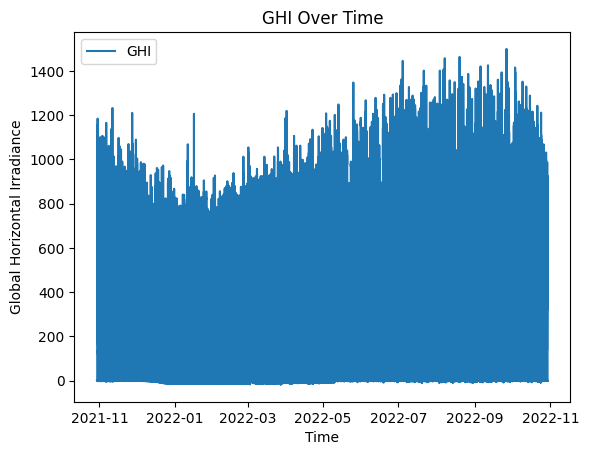

In [11]:
# Correlation matrix
plt.plot(data['Timestamp'], data['GHI'], label="GHI")
plt.xlabel("Time")
plt.ylabel("Global Horizontal Irradiance")
plt.title("GHI Over Time")
plt.legend()
plt.show()

Statistical Analysis

In [12]:
ghi_mean = data['GHI'].mean()
ghi_std = data['GHI'].std()
print(f"Mean GHI: {ghi_mean}, Std GHI: {ghi_std}")

Mean GHI: 201.95751522070017, Std GHI: 298.4951504289856


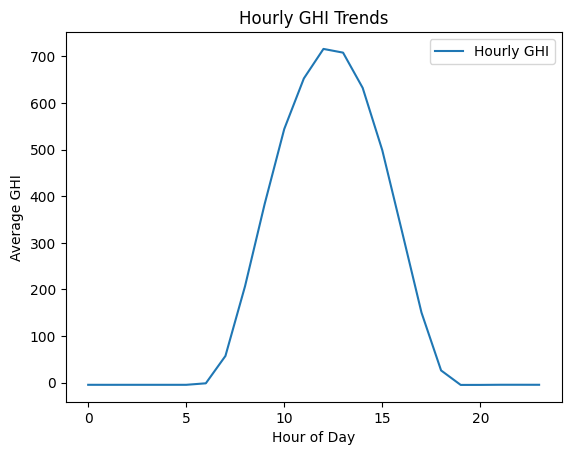

In [13]:
# Trend Analysis

# Resample to hourly means
data['Hour'] = data['Timestamp'].dt.hour
hourly_avg = data.groupby('Hour')['GHI'].mean()

# Plot hourly GHI trends
plt.plot(hourly_avg, label="Hourly GHI")
plt.xlabel("Hour of Day")
plt.ylabel("Average GHI")
plt.title("Hourly GHI Trends")
plt.legend()
plt.show()

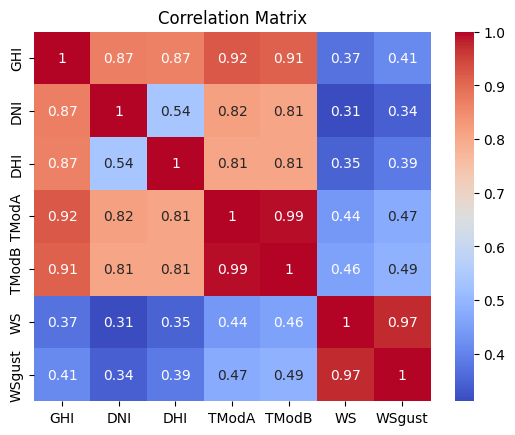

In [14]:
# Correlation matrix for selected columns
correlation = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

1. Solar irradiance (GHI) has a strong relationship with temperature metrics (TModA, TModB), which is expected since solar energy heats the atmosphere.
2. Wind speed and direction (WS, WSgust) have minimal influence on solar irradiance, suggesting wind plays a smaller role in solar farm performance.
3. Temperature metrics (TModA, TModB) are closely related and could be redundant for further analysis.